## 3.1 Hierarchical Clustering Example (HAC Algorithm)

In [1]:
import scipy.io
import matplotlib.pyplot as plt
path = './yeastData310.mat'
data = scipy.io.loadmat(path)
X = data['X']

Suppose we have a set of time series measurements of the expression levels for $N = 300$ genes at
$T = 7$ points. Thus each data sample is a vector $x_n \in \mathbb{R}^{7}$. 

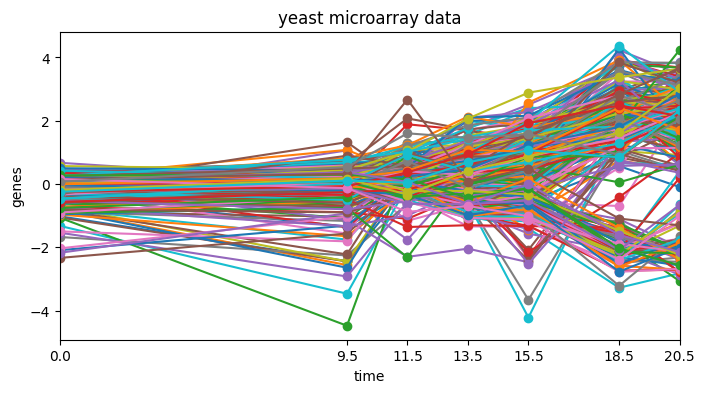

In [2]:
times = data['times']
X = X.transpose()
times = times.reshape((7,))
# yeast gene expression data plotted as a time series
plt.figure(figsize=(8, 4))
plt.plot(times, X, 'o-')
plt.title('yeast microarray data')
plt.xlabel('time')
plt.ylabel('genes')
plt.xlim([0, max(times)])
plt.xticks(ticks=times, labels=times)
plt.show();

We see that there are several kinds of genes, such as those whose expression level goes up
monotonically over time (in response to a given stimulus), those whose expression level goes down
monotonically, and those with more complex response patterns.

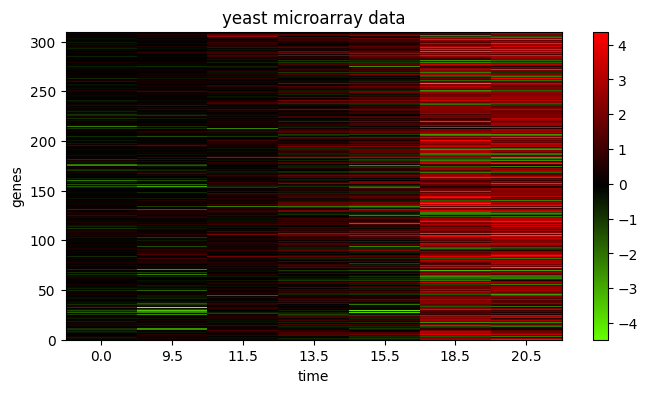

In [3]:
# yeast gene expression data plotted as a heat map
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

plt.figure(figsize=(8, 4))
basic_cols = ['#66ff00', '#000000', '#FF0000']  # green-black-red
my_cmap = LinearSegmentedColormap.from_list('mycmap', basic_cols)
plt.xticks(ticks=[i + 0.5 for i in range(0, 7)], labels=times)
plt.pcolormesh(X.transpose(), cmap=my_cmap)
plt.title('yeast microarray data')
plt.xlabel('time')
plt.ylabel('genes')
plt.colorbar()
plt.show()


Suppose we use **Correlation distance** to compute a pairwise dissimilarity matrix, $D  \in \mathbb{R}^{300\times 300}$,
and apply **HAC** using **average linkage**.

In [6]:
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
import numpy as np

X = data['X']

corrX = pdist(X, 'correlation')

In the dendrogram, identify the most significant vertical gap between nodes, and draw a horizontal line through its midpoint. The count of vertical lines intersecting this line represents the ideal number of clusters (when affinity is computed using the specified linkage method).

Interpreting the Dendrogram:
- The dendrogram visually represents the hierarchical clustering of the data.
- The vertical lines represent the distances or dissimilarities between clusters.
- The height at which two clusters are merged indicates the distance at which they were merged.
- The truncation (truncate_mode='lastp') allows you to focus on the final stages of the clustering process, showing only the last p merged clusters.

In [7]:
Z = scipy.cluster.hierarchy.linkage(corrX, method='ward')

A $(n-1)$ by $4$ matrix Z is returned. At the $i$-th iteration, clusters with indices $Z[i, 0]$ and $Z[i, 1]$ are combined to form cluster $n+i$. A cluster with an index less than $n$ corresponds to one of the $n$ original observations. The distance between clusters $Z[i, 0]$ and $Z[i, 1]$ is given by $Z[i, 2]$. The fourth value $Z[i, 3]$ represents the number of original observations in the newly formed cluster.

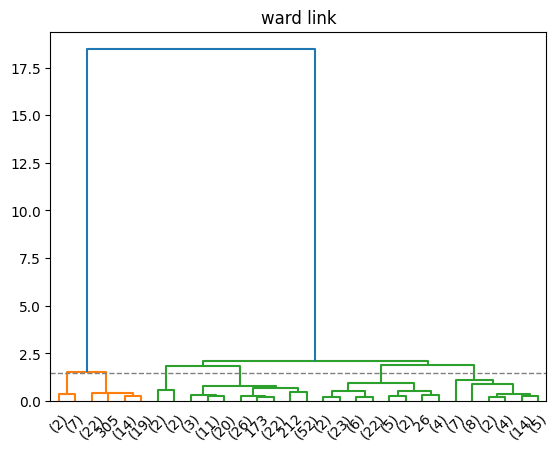

In [11]:
plt.figure()
scipy.cluster.hierarchy.dendrogram(Z, truncate_mode='lastp')
plt.title('ward link')
plt.tick_params(labelbottom=True)
plt.axhline(y=1.5, c='grey', lw=1, linestyle='dashed')
plt.show()

In [18]:
#clusterTree = AgglomerativeClustering(n_clusters=None, linkage='ward', metric='euclidean', compute_full_tree=True, distance_threshold=2) 

clusterTree = AgglomerativeClustering(n_clusters=16, linkage='ward', metric='euclidean', compute_full_tree=True) 

clusterTree.fit(X)
clusters = clusterTree.labels_

In [19]:
nclusters = 1 + np.amax(clusterTree.labels_)
print(f"Number of clusters = {nclusters}")

Number of clusters = 16


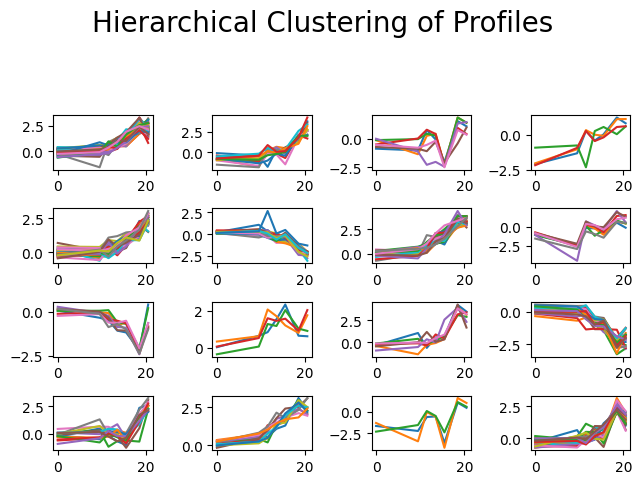

In [20]:
l = int(np.sqrt(nclusters))
fig, axes = plt.subplots(l, l)
fig.suptitle('Hierarchical Clustering of Profiles ', y = 1 ,fontsize = 20)
times = data['times'].reshape(7, )

for c in range(0, nclusters):
    occurences = np.argwhere(clusters == (c))
    row = c//l
    col = c%l
    for occ in occurences:
        axes[row][col].plot(times, X[occ, :].reshape(7,))
    
plt.tight_layout(rect=[0, 0, 1, 0.90])
plt.show()

 Time series assigned to each cluster do indeed “look like” each other.